In [1]:
import pandas


train_val = pandas.read_csv("../data/tesla/train.csv")
# table["Date"] = pandas.to_datetime(table["Date"])
size = len(train_val)
train = train_val[:int(size * 0.8)]
val = train_val[int(size * 0.8):]
train

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1077,2014-10-08,260.100006,262.880005,252.639999,259.279999,5055100,259.279999
1078,2014-10-09,262.250000,265.540009,254.399994,257.010010,7361300,257.010010
1079,2014-10-10,244.639999,245.889999,235.199997,236.910004,12888300,236.910004
1080,2014-10-13,238.570007,238.960007,221.000000,224.589996,11268700,224.589996


In [2]:
from typing import List, Tuple


CONTEXT_SIZE = 4


def extract_xy(
    table: pandas.DataFrame,
    *,
    context_size: int,
) -> Tuple[pandas.DataFrame, pandas.DataFrame]:
    extras: List[pandas.Series] = []
    input_columns: List[str] = []
    output_columns: List[str] = []

    for column in table.columns[1:]:
        for shift in range(context_size):
            to_shift = shift + 1
            series = table[column].shift(to_shift + 1)
            series.name = f"{column}-{to_shift}"

            input_columns.append(series.name)
            extras.append(series)

        series = table[column].shift(context_size + 1)
        series.name = f"{column}-output"

        output_columns.append(series.name)
        extras.append(series)

    table = pandas.concat([table, *extras], axis=1)
    table.dropna(inplace=True)
    return table[input_columns], table[output_columns]


train_input, train_output = extract_xy(train, context_size=CONTEXT_SIZE)
train_input.shape, train_output.shape

((1077, 24), (1077, 6))

In [3]:
train_input

,Open-1,Open-2,Open-3,Open-4,High-1,High-2,High-3,High-4,Low-1,Low-2,...,Close-3,Close-4,Volume-1,Volume-2,Volume-3,Volume-4,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4
5,23.000000,25.000000,25.790001,19.000000,23.100000,25.920000,30.420000,25.000000,18.709999,20.270000,...,23.830000,23.889999,5139800.0,8218800.0,17187100.0,18766300.0,19.200001,21.959999,23.830000,23.889999
6,20.000000,23.000000,25.000000,25.790001,20.000000,23.100000,25.920000,30.420000,15.830000,18.709999,...,21.959999,23.830000,6866900.0,5139800.0,8218800.0,17187100.0,16.110001,19.200001,21.959999,23.830000
7,16.400000,20.000000,23.000000,25.000000,16.629999,20.000000,23.100000,25.920000,14.980000,15.830000,...,19.200001,21.959999,6921700.0,6866900.0,5139800.0,8218800.0,15.800000,16.110001,19.200001,21.959999
8,16.139999,16.400000,20.000000,23.000000,17.520000,16.629999,20.000000,23.100000,15.570000,14.980000,...,16.110001,19.200001,7711400.0,6921700.0,6866900.0,5139800.0,17.459999,15.800000,16.110001,19.200001
9,17.580000,16.139999,16.400000,20.000000,17.900000,17.520000,16.629999,20.000000,16.549999,15.570000,...,15.800000,16.110001,4050600.0,7711400.0,6921700.0,6866900.0,17.400000,17.459999,15.800000,16.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,259.130005,253.059998,250.199997,242.199997,262.489990,256.500000,252.789993,242.660004,257.799988,251.029999,...,251.419998,240.240005,7713300.0,5406300.0,8998200.0,5941700.0,260.619995,255.210007,251.419998,240.240005
1078,258.529999,259.130005,253.059998,250.199997,261.459991,262.489990,256.500000,252.789993,255.729996,257.799988,...,255.210007,251.419998,4485500.0,7713300.0,5406300.0,8998200.0,259.570007,260.619995,255.210007,251.419998
1079,260.100006,258.529999,259.130005,253.059998,262.880005,261.459991,262.489990,256.500000,252.639999,255.729996,...,260.619995,255.210007,5055100.0,4485500.0,7713300.0,5406300.0,259.279999,259.570007,260.619995,255.210007
1080,262.250000,260.100006,258.529999,259.130005,265.540009,262.880005,261.459991,262.489990,254.399994,252.639999,...,259.570007,260.619995,7361300.0,5055100.0,4485500.0,7713300.0,257.010010,259.279999,259.570007,260.619995


In [4]:
train_output

,Open-output,High-output,Low-output,Close-output,Volume-output,Adj Close-output
5,19.000000,25.000000,17.540001,23.889999,18766300.0,23.889999
6,25.790001,30.420000,23.299999,23.830000,17187100.0,23.830000
7,25.000000,25.920000,20.270000,21.959999,8218800.0,21.959999
8,23.000000,23.100000,18.709999,19.200001,5139800.0,19.200001
9,20.000000,20.000000,15.830000,16.110001,6866900.0,16.110001
...,...,...,...,...,...,...
1077,242.199997,242.660004,235.649994,240.240005,5941700.0,240.240005
1078,250.199997,252.789993,245.360001,251.419998,8998200.0,251.419998
1079,253.059998,256.500000,251.029999,255.210007,5406300.0,255.210007
1080,259.130005,262.489990,257.799988,260.619995,7713300.0,260.619995


In [5]:
from typing import TypedDict

import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)


class Metrics(TypedDict):
    rmse: float
    mse: float
    mape: float
    r2: float


def metrics(true: pandas.DataFrame, pred: numpy.ndarray) -> Metrics:
    return {
        "rmse": root_mean_squared_error(true, pred),
        "mse": mean_squared_error(true, pred),
        "mape": mean_absolute_percentage_error(true, pred),
        "r2": r2_score(true, pred),
    }


model = LinearRegression()
model.fit(train_input, train_output)
metrics(train_output, model.predict(train_input))

{'rmse': 1.0060034241039153e-09,
 'mse': 4.6453252951420336e-18,
 'mape': 1.0705353735591497e-12,
 'r2': 1.0}

In [6]:
val_input, val_output = extract_xy(val, context_size=CONTEXT_SIZE)
metrics(val_output, model.predict(val_input))

{'rmse': 7.312622078459787e-10,
 'mse': 2.0607239998091584e-18,
 'mape': 4.736819091916135e-13,
 'r2': 1.0}

In [7]:
rmse: List[float] = []
mse: List[float] = []
mape: List[float] = []
r2: List[float] = []

for context_size in range(1, 21):
    train_input, train_output = extract_xy(train, context_size=context_size)

    model = LinearRegression()
    model.fit(train_input, train_output)

    val_input, val_output = extract_xy(val, context_size=context_size)
    m = metrics(val_output, model.predict(val_input))

    rmse.append(m["rmse"])
    mse.append(m["mse"])
    mape.append(m["mape"])
    r2.append(m["r2"])


def sort_metrics(metrics: List[float], *, reverse: bool = False) -> List[float]:
    return sorted(enumerate(metrics, start=1), key=lambda x: x[1], reverse=reverse)


print(sort_metrics(rmse, reverse=False))
print(sort_metrics(mse, reverse=False))
print(sort_metrics(mape, reverse=False))
print(sort_metrics(r2, reverse=True))

[(1, 5.727149757212143e-10), (4, 7.312622078459787e-10), (3, 8.076440506070744e-10), (2, 9.344185475237665e-10), (8, 1.2681382342196275e-09), (19, 1.4886073556884513e-09), (20, 1.5185353571027627e-09), (6, 1.5309373577877519e-09), (12, 1.5838931146655069e-09), (9, 2.0632496753782413e-09), (13, 2.1723086664977313e-09), (11, 2.951983931591041e-09), (10, 2.9530611507061183e-09), (7, 3.249684481875447e-09), (14, 5.7721502313684816e-09), (5, 6.340836735787351e-09), (15, 9.897131250148397e-09), (17, 1.2950900769982275e-08), (18, 1.4912691556609067e-08), (16, 2.342311933434024e-08)]
[(1, 9.940271085845743e-19), (4, 2.0607239998091584e-18), (2, 2.6334806108211034e-18), (3, 3.313078105586083e-18), (6, 5.6567747168163205e-18), (8, 8.278153791432269e-18), (19, 8.75298321762275e-18), (12, 9.429163248885217e-18), (20, 9.495963749144104e-18), (9, 1.6322733893897535e-17), (13, 1.812550479314918e-17), (11, 1.8366216538253482e-17), (10, 2.274160303614683e-17), (7, 2.9724732481327925e-17), (14, 3.935540

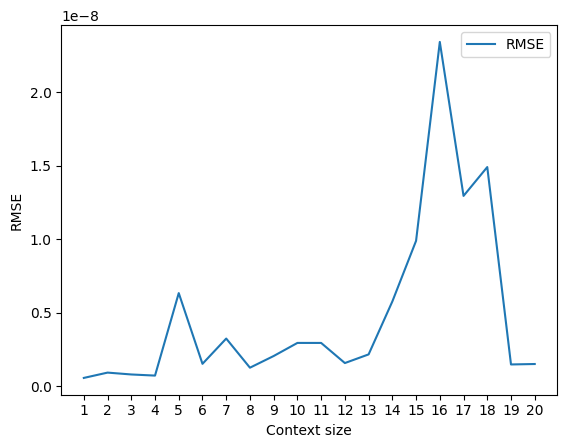

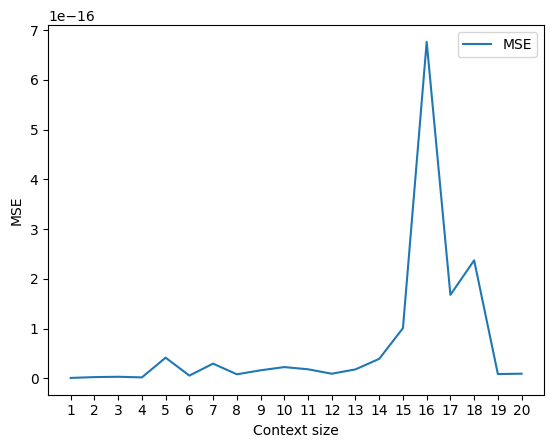

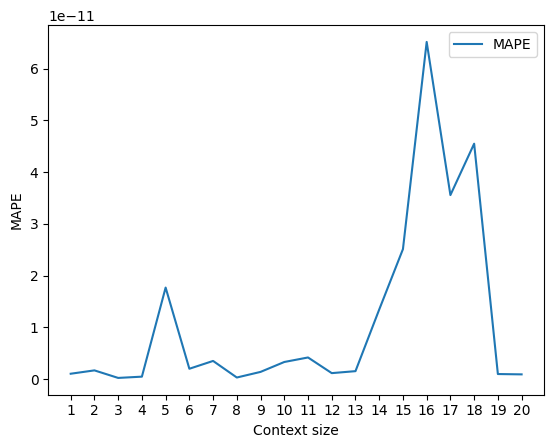

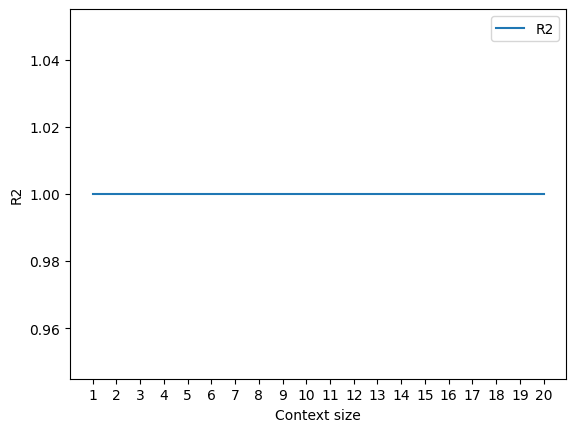

In [8]:
from matplotlib import axes, pyplot


def plot_metric(values: List[float], *, label: str) -> None:
    axes.Axes.set_xticks(pyplot.gca(), ticks=range(1, 21))
    pyplot.plot(range(1, 21), values, label=label)
    pyplot.xlabel("Context size")
    pyplot.ylabel(label)
    pyplot.legend()
    pyplot.show()


plot_metric(rmse, label="RMSE")
plot_metric(mse, label="MSE")
plot_metric(mape, label="MAPE")
plot_metric(r2, label="R2")

In [9]:
CONTEXT_SIZE = 1
train_input, train_output = extract_xy(train, context_size=CONTEXT_SIZE)
model = LinearRegression()
model.fit(train_input, train_output)

LinearRegression()

In [10]:
test = pandas.read_csv("../data/tesla/test.csv")
test_input, test_output = extract_xy(test, context_size=CONTEXT_SIZE)
metrics(test_output, model.predict(test_input))

{'rmse': 5.352131598673487e-10,
 'mse': 8.68988783598138e-19,
 'mape': 1.0227307432756633e-12,
 'r2': 1.0}